# **Demonstração da detecção e segmentação das imagens**

### **Preparação do ambiente**

Conexão com arquivos do google drive que contém as imagens e modelos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Localização do ambiente de programação

In [2]:
%cd /content/drive/MyDrive/TCC/yolov3-detect-segmentation

/content/drive/MyDrive/TCC/yolov3-detect-segmentation


Download de bibliotecas para execução da YOLO

In [3]:
!pip install torch==1.10.1+cu111 torchvision==0.11.2+cu111 torchaudio==0.10.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████▌                   | 834.1 MB 1.2 MB/s eta 0:17:33tcmalloc: large alloc 1147494400 bytes == 0x39594000 @  0x7f0e85fc5615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |███████████████▉                | 1055.7 MB 1.4 MB/s eta 0:13:08tcmalloc: large alloc 1434370048 bytes == 0x7dbea000 @  0x7f0e85fc5615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████

Importação das bibliotecas para o ambiente de programação

In [3]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import imgaug as ia
import torch
import pandas as pd
import glob
import pickle
import os
from skimage import io
from scipy import ndimage as nd

from detect_utils import detect_boxes
%matplotlib inline

Carregamento dos dados de homografia para correção da perpectiva da imagem

In [4]:
# A: loading the homography matrix
xf = np.loadtxt("xf.csv", delimiter =",")
xf

array([[     1.6218,   -0.022765,       246.7],
       [    0.01214,      1.5926,      172.03],
       [ 2.6425e-05, -1.3573e-05,           1]])

Função para salvamento de imagens cortadas

In [5]:
# A: modified version of the save_one_box from torch_utils.py
from utils.general import xyxy2xywh, xywh2xyxy, clip_coords
def save_one_box(xywh, im, file_name='image.jpg', gain=1, pad=0):
    # Save image crop as {file} with crop size multiple {gain} and {pad} pixels
    # A: for the crop to work, the BBs need to go to corner from midpoint
    x = int(xywh[0].item()*width)
    y = int(xywh[1].item()*height)
    w = int(xywh[2].item()*width)
    w2 = int(w/2 * gain + pad)
    h = int(xywh[3].item()*height)
    h2 = int(h/2 * gain + pad)

    y1 = y-h2
    y2 = y+h2
    x1 = x-w2
    x2 = x+w2
    # A: cropping is done by simply slicing the numpy of the image. [y1:y2, x1:x2]
    crop = im[y1:y2, x1:x2]

    plt.imsave(f"{img_file}_croped.png", crop, cmap=plt.cm.gray)
    io.imsave(f"{img_file}_croped.png", crop)
    cv2.imwrite(file_name, crop)



    # this return is just for display purposes
    return x1, x2, y1, y2

### **Loop para processamento das imagens e criação das bounding boxes nas imagens carregadas**

  Primeiramente é realizada a correção de perspectiva das imagens. 
  img_ir_warped = cv2.warpPerspective(img_ir, xf, (width, height))

  Após esse processo, é utilizado o modelo treinado pela YOLO para detecção das caixas delimitadoras de cada objeto.
  boxes = detect_boxes(source = file)

  Por final, as imagens são recortadas e preparadas para a segmentação.


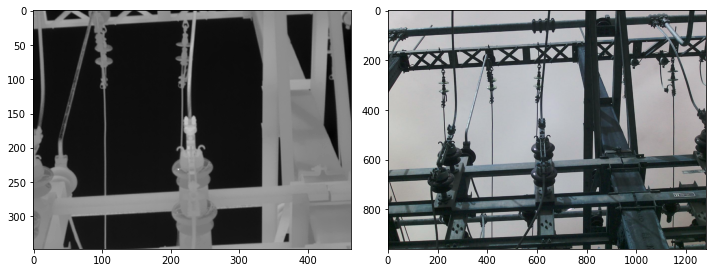

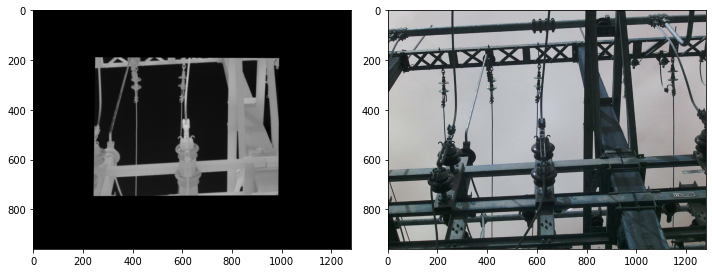

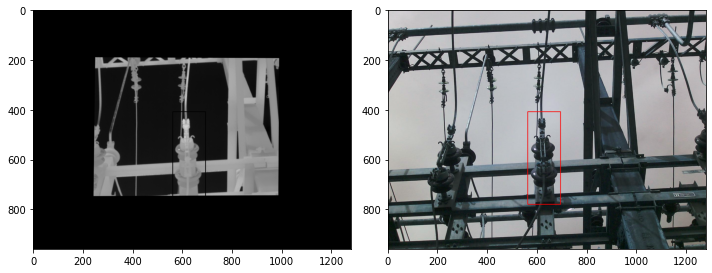

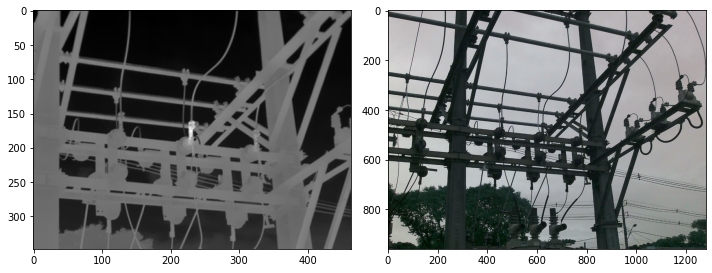

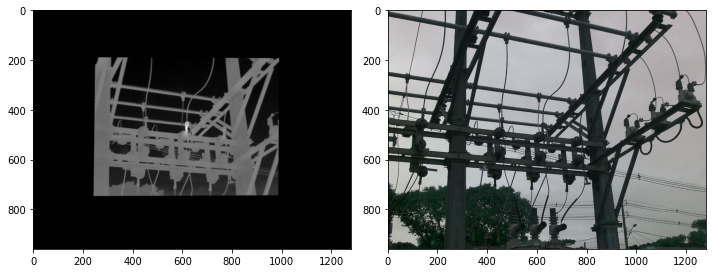

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: /content/drive/MyDrive/TCC/yolov3-detect-segmentation/amostras/FLIR7016_croped.png is a low contrast image


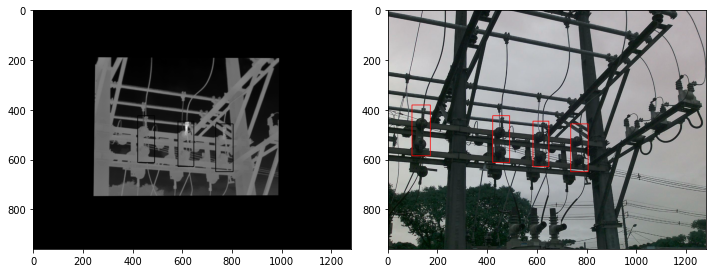

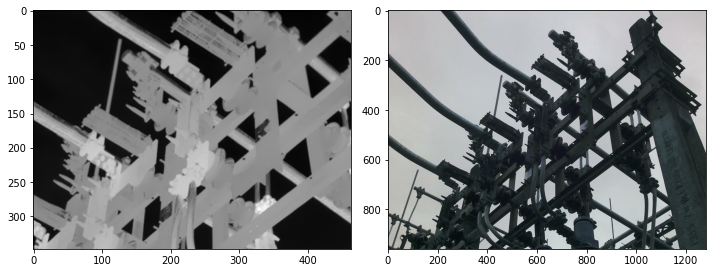

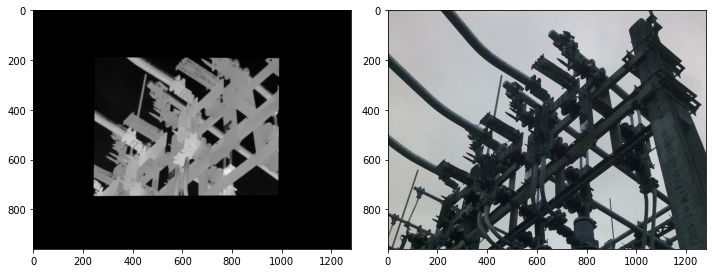

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: /content/drive/MyDrive/TCC/yolov3-detect-segmentation/amostras/FLIR7010_croped.png is a low contrast image


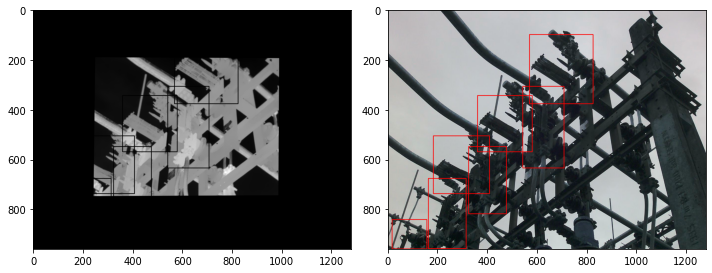

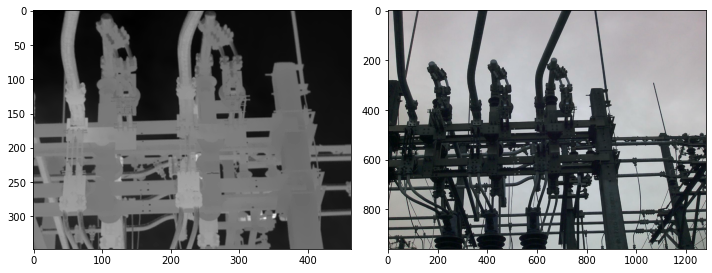

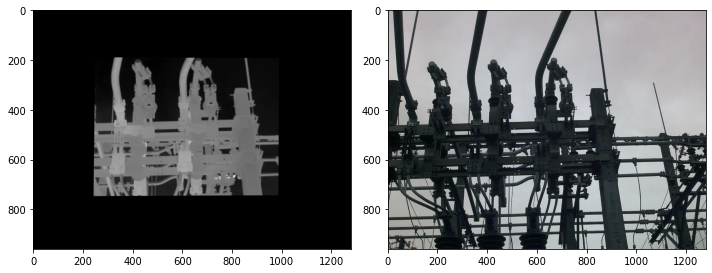

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: /content/drive/MyDrive/TCC/yolov3-detect-segmentation/amostras/FLIR7007_croped.png is a low contrast image


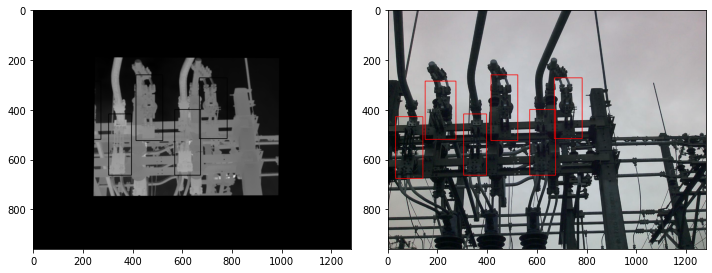

In [6]:
files = glob.glob("/content/drive/MyDrive/TCC/yolov3-detect-segmentation/amostras/*")
file=""

for file in files:

  if os.path.basename(file).endswith("b.jpg"):

    imagem = os.path.basename(file)[0:8]
    img_rgb = cv2.imread(file, cv2.IMREAD_UNCHANGED)

    caminho = files

    img_ir = cv2.imread(os.path.dirname(file)+"/"+os.path.basename(file)[0:8]+"_ir_uint16.png", cv2.IMREAD_UNCHANGED)

    #PLOTANDO AS IMAGENS  
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(121)
    ax.imshow(img_ir, cmap="gray")
    ax = fig.add_subplot(122)
    ax.imshow(img_rgb)
    plt.tight_layout()
    plt.show()

    # A: switching the thermal image's perspective to the optical's
    height, width, channels = img_rgb.shape
    img_ir_warped = cv2.warpPerspective(img_ir, xf, (width, height))


    # A: from what I tested empirically, the alignment is off by roughly 18 pixels vertically.
    # This is just a dirty fix, the correct way would be to find the xf that works.
    T = np.float32([[1, 0, +4], [0, 1, 18]])
    img_ir_warped = cv2.warpAffine(img_ir_warped, T, (width, height))
    

    #cv2.imwrite(os.path.dirname(file)+"/"+os.path.basename(file)[0:8]+"_warped.png", (img_ir_warped*65535).astype(np.uint16))
    cv2.imwrite(os.path.dirname(file)+"/"+os.path.basename(file)[0:8]+"_warped.png",(img_ir_warped*65535).astype(np.uint16))
    # A: displaying the images

    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(121)
    ax.imshow(img_ir_warped, cmap="gray")
    ax = fig.add_subplot(122)
    ax.imshow(img_rgb)
    plt.tight_layout()
    plt.show()


# A: the detection will be made on the optical image

########################################################
########################################################
    boxes = detect_boxes(source = file)
    df = pd.DataFrame(boxes[0]['boxes'])

    img_file = os.path.dirname(file)+"/"+os.path.basename(file)[0:8]
    class_occ = [0]*15
    rgb_copy = img_rgb.copy()
    for *xywh, conf, cls in torch.Tensor(boxes[0]['boxes']):
        c = int(cls)  # integer class
        class_occ[c] += 1
        # A: optical image
        x1, x2, y1, y2 = save_one_box(xywh, img_rgb, file_name=f'{img_file}_optical_class{c}_{class_occ[c]}.png')
        # A: just to show the bbs
        cv2.rectangle(rgb_copy, (x1, y1), (x2, y2), (255, 0, 0), 2)
    class_occ = [0]*15
    #img_ir_warped = cv2.imread(os.path.dirname(file)+"/"+os.path.basename(file)[0:8]+"_warped.png")
    ir_copy = img_ir_warped.copy()
    for *xywh, conf, cls in torch.Tensor(boxes[0]['boxes']):
        c = int(cls)  # integer class
        class_occ[c] += 1
        # A: thermal image
        x1, x2, y1, y2 = save_one_box(xywh, img_ir_warped, file_name=f'{img_file}_thermal_class{c}_{class_occ[c]}.png')
        # A: just to show the bbs
        cv2.rectangle(ir_copy, (x1, y1), (x2, y2), (255, 0, 0), 2)
    # A: displaying the images
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(121)
    ax.imshow(ir_copy, cmap="gray")
    ax = fig.add_subplot(122)
    ax.imshow(rgb_copy)
    plt.tight_layout()
    plt.show()







### **Random Forest**

Função para processamento utilizando o modelo RAndom Forest

In [7]:
#Predict da imagem
def create_features(img, img_gray, label, train=True):
    dfImg = pd.DataFrame()
    
    Pixels_arr = []
    img_array = img
    img = img_gray
    
    img = img.reshape(-1)
    
    Pixels_arr.append(img)
    
    Pixels_arr = np.array(Pixels_arr)
    Pixels_arr = Pixels_arr.flatten()
    dfImg['Imagem Original'] = Pixels_arr
    
    #Feature da temperatura de cada píxel
    #Definindo o nome das pastas
    DirImagens = ''
    DirTemps = DirImagens

    pathImgs = os.path.join(DirImagens, imgCropped)
    pathTemps = os.path.join(DirTemps, tempImg)

    #Feature da temperatura de cada píxel
    tempMinima = []
    tempDelta = []

    file_path = os.path.join(pathTemps)
    with open(file_path, 'r') as f:
        tempMin = (f.readlines()[3])
        tempMin = tempMin.rstrip('\n')
        tempMin = float(tempMin)
        tempMinima.append(tempMin)
    with open(file_path, 'r') as f:
        tempDelt = (f.readlines()[5])
        tempDelt = tempDelt.rstrip('\n')
        tempDelt = float(tempDelt)
        tempDelta.append(tempDelt)

    Pixels_arr = []
    img_array = imread(os.path.join(pathImgs))
    for i in range(len(tempDelta)):
        img = ((img_array * tempDelta[i])/65535)+tempMinima[i]
    img = img.reshape(-1)
    Pixels_arr.append(img)

    Pixels_arr = np.array(Pixels_arr)
    Pixels_arr = Pixels_arr.flatten()

    dfImg['Temperaturas'] = Pixels_arr
    
    img2 = img_gray.reshape(-1)
    #Define os parametros e realiza a extração das gaborFeatures
    num = 1
    kernels = []
    for theta in range(2):
        theta = theta/4.*np.pi 
        for sigma in (1, 3):
            for lamda in np.arange(0, np.pi, np.pi/4):
                for gamma in(0.05, 0.5):
                    gabor_label = 'Gabor' + str(num)
                    ksize = 5
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)
                    kernels.append(kernel)
                    #print(img_gray.dtype,img_gray.shape)
                    fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                    #print(fimg.dtype,fimg.shape)
                    filtered_img = fimg.reshape(-1)
                    dfImg[gabor_label] = filtered_img
                    num += 1
    
    #Transforma a imagem em uma matriz unidimensional e seta essa matriz para o data frame como Imagem Original
    img2 = img.reshape(-1)
    
    #Gaussian filtro
    Gaussian_arr = []
    img = img_gray
    gaussian_img = nd.gaussian_filter(img, sigma=3)
    gaussian_img1 = gaussian_img.reshape(-1)
    Gaussian_arr.append(gaussian_img1)

    Gaussian_arr = np.array(Gaussian_arr)
    Gaussian_arr = Gaussian_arr.flatten()
    dfImg['Gaussian filtro s3'] = Gaussian_arr
    
    #Gaussian filtro
    Gaussian_arr = []
    img = img_gray
    gaussian_img2 = nd.gaussian_filter(img, sigma=7)
    gaussian_img3 = gaussian_img2.reshape(-1)
    Gaussian_arr.append(gaussian_img3)

    Gaussian_arr = np.array(Gaussian_arr)
    Gaussian_arr = Gaussian_arr.flatten()
    dfImg['Gaussian filtro s7'] = Gaussian_arr

    #MEDIAN filtro
    MEDIAN_arr = []
    img = img_gray
    median_img = nd.median_filter(img, size=3)
    median_img1 = median_img.reshape(-1)
    MEDIAN_arr.append(median_img1)

    MEDIAN_arr = np.array(MEDIAN_arr)
    MEDIAN_arr = MEDIAN_arr.flatten()
    dfImg['MEDIAN filtro'] = MEDIAN_arr
    
    #VARIANCE with size=3
    variance_arr =[]
    img = img_gray
    variance_img = nd.generic_filter(img, np.var, size=3)
    variance_img1 = variance_img.reshape(-1)
    variance_arr.append(variance_img1)
    
    variance_arr = np.array(variance_arr)
    variance_arr = variance_arr.flatten()    
    dfImg['Variance s3'] = variance_arr
    
    features = dfImg
    labels = None
    
    display(dfImg)

    return features

Função que devolve a imagem tratada chamada no código principal

In [8]:
def compute_prediction(img, model):

    features = create_features(img, img_gray, label=None, train=False)
    predictions = model.predict(features)
    pred_size = int(math.sqrt(features.shape[0]))
    h, w = img.shape[:2]
    inference_img = predictions.reshape(h, w) #FLIR6176

    return inference_img

Carregamento do modelo de RF

In [9]:
load_model = pickle.load(open('RF_model', 'rb'))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


Código principal Random Forest

Imagem Original  Temperaturas  Gabor1  Gabor2  Gabor3  ...  Gabor32  \
0                   15      8.984403       0       0      42  ...       16   
1                   15      8.976968       0       0      42  ...       16   
2                   15      8.970885       0       0      42  ...       16   
3                   15      8.967505       0       0      42  ...       16   
4                   15      8.963450       0       0      42  ...       16   
...                ...           ...     ...     ...     ...  ...      ...   
49099                0      6.446365       0       0       0  ...        0   
49100                0      6.446365       0       0       0  ...        0   
49101                0      6.446365       0       0       0  ...        0   
49102                0      6.446365       0       0       0  ...        0   
49103                0      6.446365       0       0       0  ...        0   

       Gaussian filtro s3  Gaussian filtro s7  MEDIAN filtro  Variance s3  
0                      15                  15             15            0  
1                      15                  15             15            0  
2                      15                  15             15            0  
3                      15                  15             15            0  
4                      15                  15             15            0  
...                   ...                 ...            ...          ...  
49099                   0                   0              0            0  
49100                   0                   0              0            0  
49101                   0                   0              0            0  
49102                   0                   0              0            0  
49103                   0                   0              0            0  

[49104 rows x 38 columns]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


amostras/FLIR7798_segmented1_1.png
FLIR7798


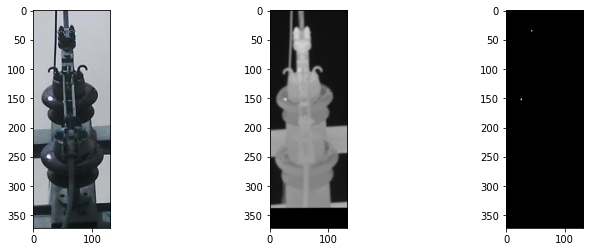

Imagem Original  Temperaturas  Gabor1  Gabor2  Gabor3  ...  Gabor32  \
0                    2     10.923127       0       0       5  ...        2   
1                    1     10.856698       0       0       5  ...        3   
2                    2     10.991167       0       0       6  ...        3   
3                    3     11.074103       0       0       7  ...        1   
4                    3     11.042297       0       0       8  ...        2   
...                ...           ...     ...     ...     ...  ...      ...   
11643               89     19.429276       0       0     255  ...      117   
11644               89     19.501341       0       0     255  ...      115   
11645               97     20.292049       0       0     255  ...      108   
11646              108     21.232524       0       0     255  ...       97   
11647              113     21.664515       0       0     255  ...       92   

       Gaussian filtro s3  Gaussian filtro s7  MEDIAN filtro  Variance s3  
0                      10                  41              2            0  
1                      10                  41              2            0  
2                      10                  41              2            0  
3                      10                  41              3            0  
4                      10                  41              3            0  
...                   ...                 ...            ...          ...  
11643                 110                 111             97           95  
11644                 110                 111             97           89  
11645                 110                 111            108           80  
11646                 110                 111            111           41  
11647                 110                 111            113            5  

[11648 rows x 38 columns]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


amostras/FLIR7016_segmented1_1.png
FLIR7016


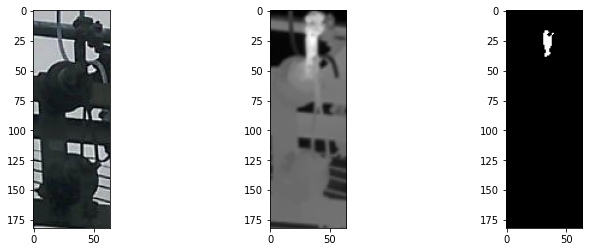

Imagem Original  Temperaturas  Gabor1  Gabor2  Gabor3  ...  Gabor32  \
0                  192     21.541319       0       0     255  ...      185   
1                  190     21.451137       0       0     255  ...      184   
2                  182     21.016328       0       0     255  ...      180   
3                  172     20.450271       0       0     255  ...      160   
4                  158     19.726798       0       0     255  ...      131   
...                ...           ...     ...     ...     ...  ...      ...   
13435              178     20.792482       0       0     255  ...      186   
13436              178     20.796105       0       0     255  ...      187   
13437              178     20.802547       0       0     255  ...      187   
13438              179     20.820664       0       0     255  ...      186   
13439              179     20.867366       0       0     255  ...      186   

       Gaussian filtro s3  Gaussian filtro s7  MEDIAN filtro  Variance s3  
0                     184                 163            192            0  
1                     182                 162            190           15  
2                     177                 160            182           46  
3                     170                 157            176           95  
4                     161                 154            160           86  
...                   ...                 ...            ...          ...  
13435                 176                 167            178            0  
13436                 177                 168            178            0  
13437                 177                 169            178            0  
13438                 177                 169            179            0  
13439                 177                 170            179            0  

[13440 rows x 38 columns]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


amostras/FLIR7016_segmented1_2.png
FLIR7016


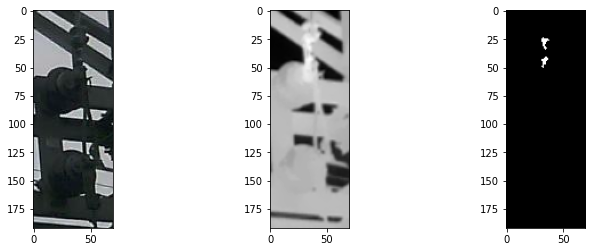

Imagem Original  Temperaturas  Gabor1  Gabor2  Gabor3  ...  Gabor32  \
0                    6     10.843413       0       0      18  ...        8   
1                    6     10.867569       0       0      18  ...        7   
2                    7     10.898971       0       0      19  ...        6   
3                    7     10.914673       0       0      19  ...        6   
4                    7     10.879647       0       0      19  ...        6   
...                ...           ...     ...     ...     ...  ...      ...   
12779              236     21.657268       0       0     255  ...      247   
12780              236     21.677398       0       0     255  ...      249   
12781              237     21.726918       0       0     255  ...      248   
12782              238     21.741412       0       0     255  ...      247   
12783              238     21.741814       0       0     255  ...      248   

       Gaussian filtro s3  Gaussian filtro s7  MEDIAN filtro  Variance s3  
0                       7                  35              6            0  
1                       7                  35              6            0  
2                       7                  35              7            0  
3                       7                  35              7            0  
4                       7                  35              7            0  
...                   ...                 ...            ...          ...  
12779                 235                 235            236            0  
12780                 236                 235            237            0  
12781                 236                 235            238            0  
12782                 236                 235            238            0  
12783                 236                 235            238            0  

[12784 rows x 38 columns]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


amostras/FLIR7016_segmented1_3.png
FLIR7016


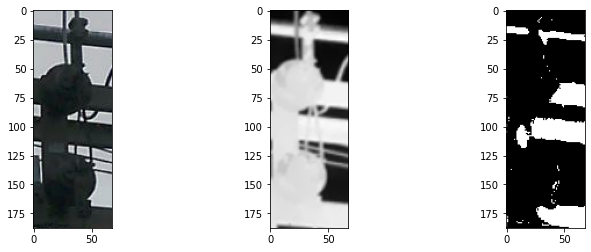

Imagem Original  Temperaturas  Gabor1  Gabor2  Gabor3  ...  Gabor32  \
0                    6      8.903505       0       0      17  ...        6   
1                    6      8.900139       0       0      17  ...        6   
2                    6      8.896399       0       0      17  ...        6   
3                    6      8.891163       0       0      16  ...        6   
4                    6      8.884431       0       0      16  ...        6   
...                ...           ...     ...     ...     ...  ...      ...   
49715              174     21.255241       0       0     255  ...      182   
49716              174     21.252249       0       0     255  ...      183   
49717              174     21.301989       0       0     255  ...      185   
49718              176     21.404836       0       0     255  ...      182   
49719              177     21.480008       0       0     255  ...      180   

       Gaussian filtro s3  Gaussian filtro s7  MEDIAN filtro  Variance s3  
0                       5                   5              6            0  
1                       5                   5              6            0  
2                       5                   5              6            0  
3                       5                   5              6            0  
4                       5                   5              6            0  
...                   ...                 ...            ...          ...  
49715                 174                 173            174            0  
49716                 174                 173            174            0  
49717                 174                 173            174            0  
49718                 174                 173            176            1  
49719                 174                 173            177            0  

[49720 rows x 38 columns]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


amostras/FLIR7010_segmented2_1.png
FLIR7010


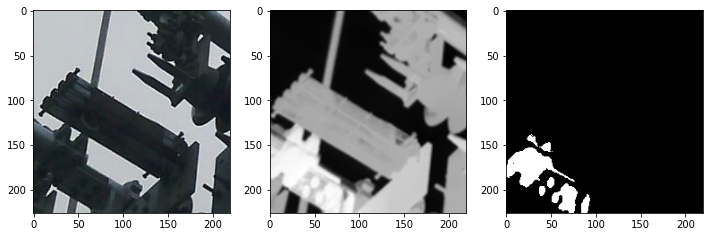

Imagem Original  Temperaturas  Gabor1  Gabor2  Gabor3  ...  Gabor32  \
0                    0      7.560136       0       0       0  ...        0   
1                    0      7.560136       0       0       0  ...        0   
2                    0      7.560136       0       0       0  ...        0   
3                    0      7.560136       0       0       0  ...        0   
4                    0      7.560136       0       0       0  ...        0   
...                ...           ...     ...     ...     ...  ...      ...   
71163              207     21.769850       0       0     255  ...      217   
71164              208     21.797525       0       0     255  ...      217   
71165              208     21.820338       0       0     255  ...      218   
71166              208     21.842404       0       0     255  ...      218   
71167              209     21.864469       0       0     255  ...      217   

       Gaussian filtro s3  Gaussian filtro s7  MEDIAN filtro  Variance s3  
0                       0                   0              0            0  
1                       0                   0              0            0  
2                       0                   0              0            0  
3                       0                   0              0            0  
4                       0                   0              0            0  
...                   ...                 ...            ...          ...  
71163                 206                 205            207            0  
71164                 206                 205            208            0  
71165                 207                 205            208            0  
71166                 207                 205            208            0  
71167                 207                 205            208            0  

[71168 rows x 38 columns]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


amostras/FLIR7010_segmented2_2.png
FLIR7010


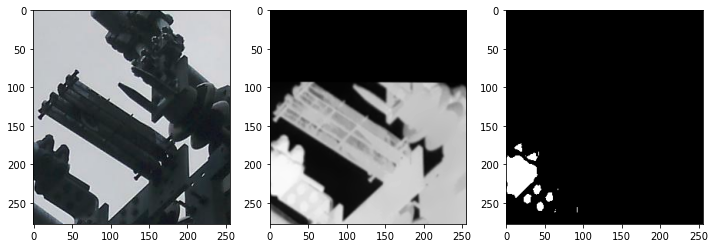

Imagem Original  Temperaturas  Gabor1  Gabor2  Gabor3  ...  Gabor32  \
0                    0      7.560136       0       0       0  ...        0   
1                    0      7.560136       0       0       0  ...        0   
2                    0      7.560136       0       0       0  ...        0   
3                    0      7.560136       0       0       0  ...        0   
4                    0      7.560136       0       0       0  ...        0   
...                ...           ...     ...     ...     ...  ...      ...   
52427              217     25.348551       0       0     255  ...      228   
52428              218     25.378470       0       0     255  ...      227   
52429              218     25.413251       0       0     255  ...      228   
52430              218     25.448780       0       0     255  ...      228   
52431              219     25.468975       0       0     255  ...      227   

       Gaussian filtro s3  Gaussian filtro s7  MEDIAN filtro  Variance s3  
0                       0                   0              0            0  
1                       0                   0              0            0  
2                       0                   0              0            0  
3                       0                   0              0            0  
4                       0                   0              0            0  
...                   ...                 ...            ...          ...  
52427                 216                 214            217            0  
52428                 216                 215            218            0  
52429                 216                 215            218            0  
52430                 216                 215            218            0  
52431                 217                 215            218            0  

[52432 rows x 38 columns]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


amostras/FLIR7010_segmented2_3.png
FLIR7010


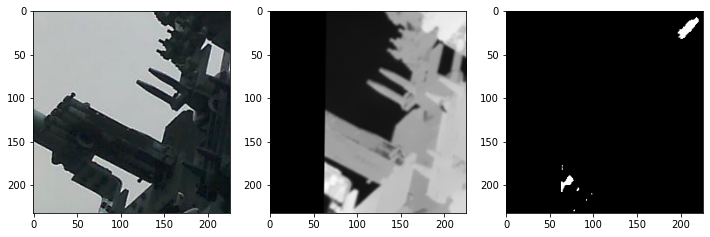

Imagem Original  Temperaturas  Gabor1  Gabor2  Gabor3  ...  Gabor32  \
0                    0      9.151103       0       0       0  ...        0   
1                    0      9.171060       0       0       0  ...        0   
2                    0      9.191016       0       0       0  ...        0   
3                    0      9.211437       0       0       1  ...        1   
4                    0      9.231858       0       0       1  ...        1   
...                ...           ...     ...     ...     ...  ...      ...   
27451              135     21.637837       0       0     255  ...      142   
27452              134     21.608135       0       0     255  ...      142   
27453              135     21.627163       0       0     255  ...      141   
27454              135     21.647584       0       0     255  ...      140   
27455              135     21.642943       0       0     255  ...      141   

       Gaussian filtro s3  Gaussian filtro s7  MEDIAN filtro  Variance s3  
0                       0                   1              0            0  
1                       0                   1              0            0  
2                       0                   2              0            0  
3                       0                   2              0            0  
4                       0                   3              0            0  
...                   ...                 ...            ...          ...  
27451                 135                 136            135            0  
27452                 135                 136            135            0  
27453                 135                 136            135            0  
27454                 135                 136            135            0  
27455                 135                 136            135            0  

[27456 rows x 38 columns]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


amostras/FLIR7007_segmented3_1.png
FLIR7007


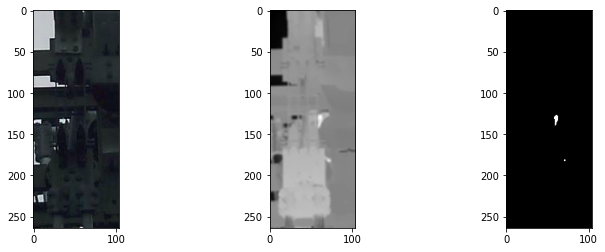

Imagem Original  Temperaturas  Gabor1  Gabor2  Gabor3  ...  Gabor32  \
0                  232     21.314356       0       0     255  ...      247   
1                  234     21.395111       0       0     255  ...      244   
2                  234     21.415995       0       0     255  ...      243   
3                  234     21.406249       0       0     255  ...      243   
4                  233     21.347308       0       0     255  ...      244   
...                ...           ...     ...     ...     ...  ...      ...   
27323              239     21.708845       0       0     255  ...      249   
27324              239     21.689353       0       0     255  ...      249   
27325              238     21.622058       0       0     255  ...      250   
27326              238     21.616489       0       0     255  ...      250   
27327              238     21.633660       0       0     255  ...      249   

       Gaussian filtro s3  Gaussian filtro s7  MEDIAN filtro  Variance s3  
0                     224                 202            232           13  
1                     225                 202            234            9  
2                     226                 202            234            0  
3                     228                 202            234            0  
4                     229                 202            233            0  
...                   ...                 ...            ...          ...  
27323                 235                 231            239            0  
27324                 235                 230            238            0  
27325                 235                 230            238            0  
27326                 235                 230            238            0  
27327                 235                 230            238            0  

[27328 rows x 38 columns]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


amostras/FLIR7007_segmented2_1.png
FLIR7007


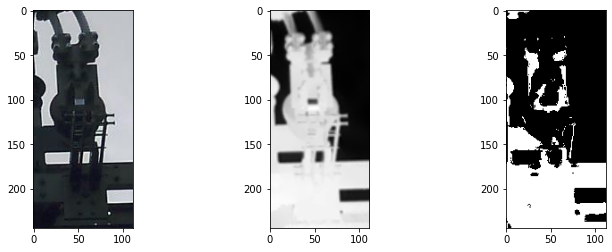

Imagem Original  Temperaturas  Gabor1  Gabor2  Gabor3  ...  Gabor32  \
0                  193     20.279867       0       0     255  ...      234   
1                  206     21.188120       0       0     255  ...      213   
2                  210     21.406249       0       0     255  ...      201   
3                  206     21.154704       0       0     255  ...      215   
4                  204     21.044712       0       0     255  ...      221   
...                ...           ...     ...     ...     ...  ...      ...   
28507              224     22.368338       0       0     255  ...      233   
28508              222     22.250920       0       0     255  ...      235   
28509              220     22.120506       0       0     255  ...      237   
28510              222     22.209150       0       0     255  ...      232   
28511              224     22.342348       0       0     255  ...      227   

       Gaussian filtro s3  Gaussian filtro s7  MEDIAN filtro  Variance s3  
0                     200                 201            193           37  
1                     201                 201            206           51  
2                     201                 201            206            3  
3                     202                 201            206            6  
4                     203                 200            204            1  
...                   ...                 ...            ...          ...  
28507                 223                 220            224            2  
28508                 223                 220            222            2  
28509                 223                 220            222            0  
28510                 222                 220            222            2  
28511                 222                 220            224            0  

[28512 rows x 38 columns]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


amostras/FLIR7007_segmented2_2.png
FLIR7007


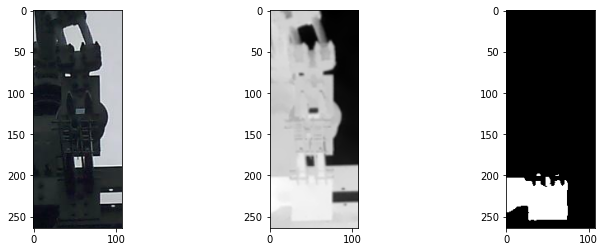

Imagem Original  Temperaturas  Gabor1  Gabor2  Gabor3  ...  Gabor32  \
0                    0      6.965635       0       0       0  ...        0   
1                    0      6.965635       0       0       0  ...        0   
2                    0      6.965635       0       0       0  ...        0   
3                    0      6.965635       0       0       0  ...        0   
4                    0      6.965635       0       0       0  ...        0   
...                ...           ...     ...     ...     ...  ...      ...   
29011              197     21.581681       0       0     255  ...      207   
29012              197     21.529701       0       0     255  ...      208   
29013              197     21.549193       0       0     255  ...      207   
29014              198     21.611383       0       0     255  ...      206   
29015              198     21.590963       0       0     255  ...      206   

       Gaussian filtro s3  Gaussian filtro s7  MEDIAN filtro  Variance s3  
0                       0                   0              0            0  
1                       0                   0              0            0  
2                       0                   0              0            0  
3                       0                   0              0            0  
4                       0                   0              0            0  
...                   ...                 ...            ...          ...  
29011                 200                 203            198            1  
29012                 200                 203            197            2  
29013                 200                 203            198            1  
29014                 200                 203            198            0  
29015                 200                 203            198            0  

[29016 rows x 38 columns]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


amostras/FLIR7007_segmented2_3.png
FLIR7007


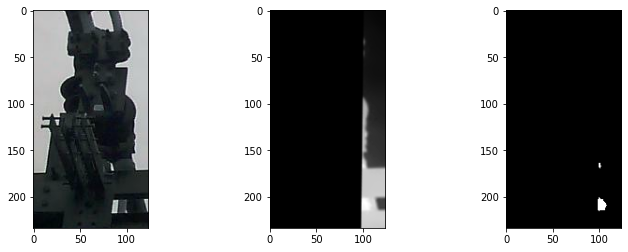

Imagem Original  Temperaturas  Gabor1  Gabor2  Gabor3  ...  Gabor32  \
0                    6     10.146144       0       0      17  ...        6   
1                    6     10.154498       0       0      17  ...        6   
2                    6     10.165636       0       0      17  ...        6   
3                    6     10.176311       0       0      17  ...        6   
4                    6     10.183736       0       0      17  ...        7   
...                ...           ...     ...     ...     ...  ...      ...   
22627              172     21.594212       0       0     255  ...      182   
22628              172     21.571935       0       0     255  ...      183   
22629              173     21.681927       0       0     255  ...      182   
22630              175     21.790064       0       0     255  ...      180   
22631              175     21.784959       0       0     255  ...      180   

       Gaussian filtro s3  Gaussian filtro s7  MEDIAN filtro  Variance s3  
0                       6                  12              6            0  
1                       6                  12              6            0  
2                       6                  13              6            0  
3                       6                  15              6            0  
4                       6                  17              6            0  
...                   ...                 ...            ...          ...  
22627                 171                 170            172            0  
22628                 171                 170            172            0  
22629                 171                 170            173            1  
22630                 171                 170            173            0  
22631                 171                 170            175            0  

[22632 rows x 38 columns]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


amostras/FLIR7007_segmented3_2.png
FLIR7007


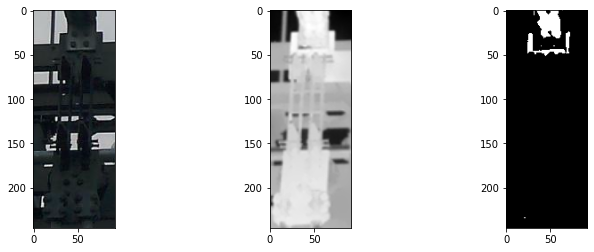

Imagem Original  Temperaturas  Gabor1  Gabor2  Gabor3  ...  Gabor32  \
0                   16      9.309283       0       0      50  ...       22   
1                   17      9.431577       0       0      49  ...       19   
2                   19      9.532180       0       0      49  ...       15   
3                   18      9.525074       0       0      50  ...       18   
4                   17      9.444667       0       0      70  ...       45   
...                ...           ...     ...     ...     ...  ...      ...   
54443              190     22.220507       0       0     255  ...      193   
54444              189     22.131871       0       0     255  ...      171   
54445              181     21.533863       0       0     255  ...      135   
54446              154     19.571168       0       0     255  ...      180   
54447              105     15.940482       0       0     255  ...      250   

       Gaussian filtro s3  Gaussian filtro s7  MEDIAN filtro  Variance s3  
0                      24                  90             16            0  
1                      26                  91             17            1  
2                      31                  95             18            0  
3                      40                  99             18            0  
4                      52                 105             18            4  
...                   ...                 ...            ...          ...  
54443                 183                 187            190            0  
54444                 180                 187            189           14  
54445                 177                 187            181          203  
54446                 174                 186            154          147  
54447                 172                 186            121           15  

[54448 rows x 38 columns]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


amostras/FLIR7010_segmented3_1.png
FLIR7010


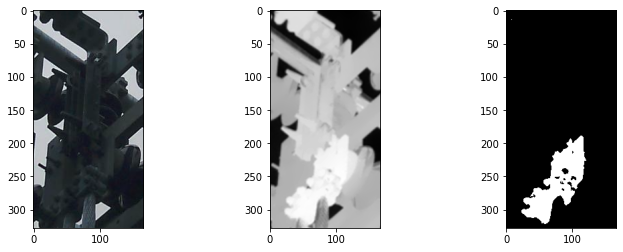

Imagem Original  Temperaturas  Gabor1  Gabor2  Gabor3  ...  Gabor32  \
0                   34     10.199377       0       0     151  ...       95   
1                   48     11.270107       0       0     171  ...       94   
2                   69     12.873024       0       0     220  ...       99   
3                  105     15.616982       0       0     255  ...      106   
4                  135     17.892331       0       0     255  ...      110   
...                ...           ...     ...     ...     ...  ...      ...   
41035                0      7.560136       0       0       0  ...        0   
41036                0      7.560136       0       0       0  ...        0   
41037                0      7.560136       0       0       0  ...        0   
41038                0      7.560136       0       0       0  ...        0   
41039                0      7.560136       0       0       0  ...        0   

       Gaussian filtro s3  Gaussian filtro s7  MEDIAN filtro  Variance s3  
0                     109                 144             48          148  
1                     111                 145             60          219  
2                     117                 145             69          198  
3                     124                 147            105          118  
4                     132                 148            135          222  
...                   ...                 ...            ...          ...  
41035                   0                   0              0            0  
41036                   0                   0              0            0  
41037                   0                   0              0            0  
41038                   0                   0              0            0  
41039                   0                   0              0            0  

[41040 rows x 38 columns]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


amostras/FLIR7010_segmented3_2.png
FLIR7010


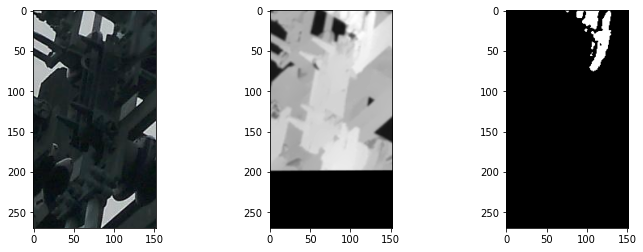

Imagem Original  Temperaturas  Gabor1  Gabor2  Gabor3  ...  Gabor32  \
0                    0      7.560136       0       0       0  ...        0   
1                    0      7.560136       0       0       0  ...        0   
2                    0      7.560136       0       0       0  ...        0   
3                    0      7.560136       0       0       0  ...        0   
4                    0      7.560136       0       0       0  ...        0   
...                ...           ...     ...     ...     ...  ...      ...   
16515                0      7.560136       0       0       0  ...        0   
16516                0      7.560136       0       0       0  ...        0   
16517                0      7.560136       0       0       0  ...        0   
16518                0      7.560136       0       0       0  ...        0   
16519                0      7.560136       0       0       0  ...        0   

       Gaussian filtro s3  Gaussian filtro s7  MEDIAN filtro  Variance s3  
0                       0                   0              0            0  
1                       0                   0              0            0  
2                       0                   0              0            0  
3                       0                   0              0            0  
4                       0                   0              0            0  
...                   ...                 ...            ...          ...  
16515                   0                   0              0            0  
16516                   0                   0              0            0  
16517                   0                   0              0            0  
16518                   0                   0              0            0  
16519                   0                   0              0            0  

[16520 rows x 38 columns]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


amostras/FLIR7010_segmented1_1.png
FLIR7010


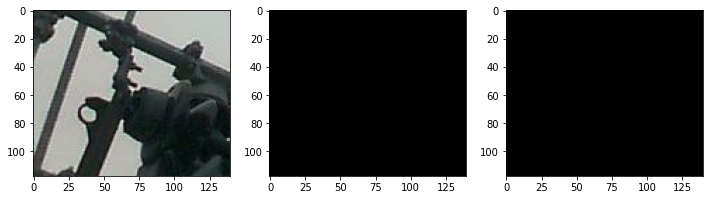

In [10]:
c=1
file=""
path = glob.glob("/content/drive/MyDrive/TCC/yolov3-detect-segmentation/amostras/*")

for file in path:

  if os.path.basename(file).endswith("thermal_class1_1.png") or os.path.basename(file).endswith("thermal_class1_2.png") or os.path.basename(file).endswith("thermal_class1_3.png") or os.path.basename(file).endswith("thermal_class2_1.png") or os.path.basename(file).endswith("thermal_class2_2.png") or os.path.basename(file).endswith("thermal_class2_3.png") or os.path.basename(file).endswith("thermal_class3_1.png") or os.path.basename(file).endswith("thermal_class3_2.png"):
    
    imgCropped = file
    img = cv2.imread(imgCropped, cv2.IMREAD_UNCHANGED)
    plt.imsave('amostras/'+os.path.basename(file)[0:8]+'_thermal_class8bit'+file[-7:], img, cmap = plt.cm.gray )

    img8bit =cv2.imread('amostras/'+os.path.basename(file)[0:8]+'_thermal_class8bit'+file[-7:], cv2.IMREAD_UNCHANGED)
    
    img_rgb = cv2.imread('amostras/'+os.path.basename(file)[0:8]+"_optical_class"+file[-7:], cv2.IMREAD_UNCHANGED)
    caminho = path

    tempImg = '/content/drive/MyDrive/TCC/yolov3-detect-segmentation/amostras/'+os.path.basename(file)[0:8]+'_ir_parameters.txt'
    #img8bit = cv2.imread(f'/content/drive/MyDrive/TCC/yolov3-detect-segmentation/amostras{os.path.basename(file)[0:8]}_thermal_class8bit{file[-7:]}', cv2.IMREAD_UNCHANGED)
    #print(f'/content/drive/MyDrive/TCC/yolov3-detect-segmentation/amostras/{os.path.basename(file)[0:8]}_thermal_class8bit{file[-7:]}')

    img_gray = cv2.cvtColor(img8bit, cv2.COLOR_BGR2GRAY)

    inference_img = compute_prediction(img_gray, load_model)
    #Comando para salvar a segmentação
    plt.imsave("amostras/"+os.path.basename(file)[0:8]+"_segmented"+file[-7:], inference_img, cmap=plt.cm.gray)
    print("amostras/"+os.path.basename(file)[0:8]+"_segmented"+file[-7:])
    img_ir = cv2.imread(file, cv2.IMREAD_UNCHANGED)
    img_segmented = cv2.imread('amostras/'+os.path.basename(file)[0:8]+"_segmented"+file[-7:], cv2.IMREAD_UNCHANGED)


    print(os.path.basename(file)[0:8])

    fig = plt.figure(figsize=(12,4))
    ax = fig.add_subplot(131)
    ax.imshow(img_rgb, cmap="gray")
    ax = fig.add_subplot(132)
    ax.imshow(img_ir, cmap="gray")
    ax = fig.add_subplot(133)
    
    ax.imshow(img_segmented, cmap="gray")
    plt.show()
    c=1+1